### KNN分类模型

- 分类：将一个未知归类的样本归属到某一个已知的类群中
- 预测：可以根据数据的规律计算出一个未知的数据

- 概念：
    - 简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类（k-Nearest Neighbor，KNN）

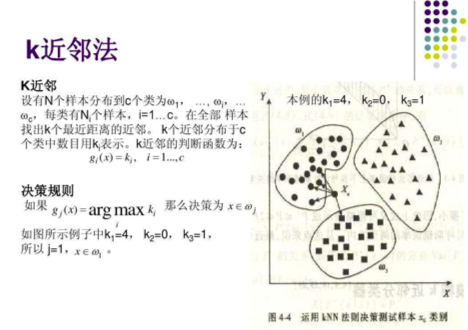

- k值的作用
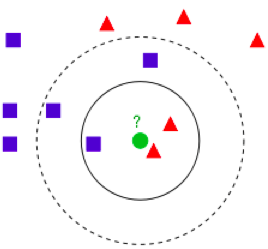

- 欧几里得距离(Euclidean Distance)
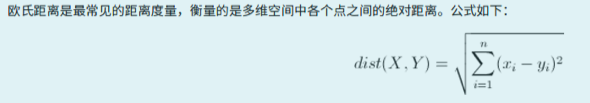

In [ ]:
a(x1,y1)
b(x2,y2)
dist(a,b) = ((x1-x2)**2 + (y1-y2)**2)**0.2

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。
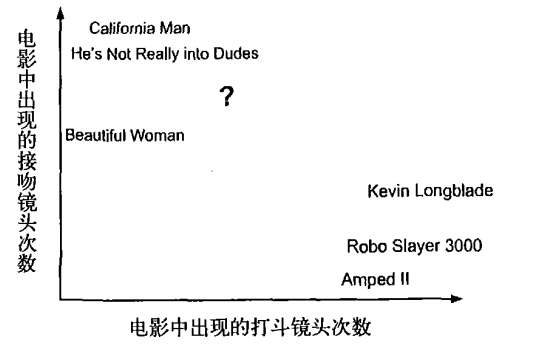

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。
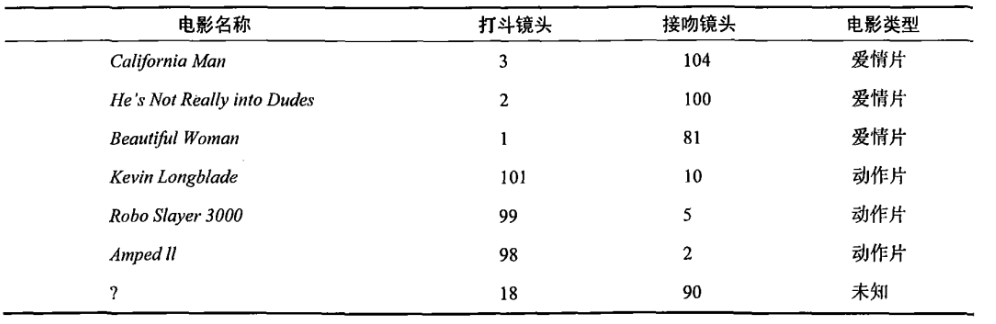

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。
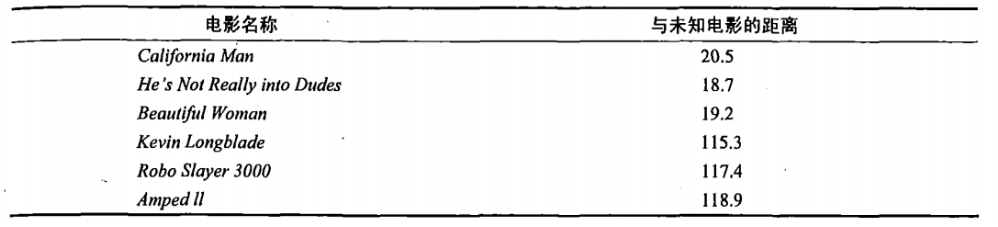

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距 离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

In [2]:
import pandas as pd
#读取数据集
data = pd.read_excel('./datasets/my_films.xlsx')
data

,名字,Action Lens,Love Lens,target
0,前任3,4,10,Love
1,西游记,16,2,Action
2,战狼2,18,3,Action
3,失恋33天,2,13,Love
4,宝贝计划,4,2,Comedy
5,捉妖记,10,10,Action
6,乡村爱情,3,4,Comedy
7,阳光的快乐生活,2,3,Comedy
8,后来的你们,2,11,Love
9,大话西游,18,2,Action


In [3]:
#样本数据的提取
feature = data[['Action Lens','Love Lens']]
target = data['target']

In [6]:
#训练模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #实例化模型对象
#训练模型
knn.fit(feature,target)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#对未知数据的分类
knn.predict([[70,39]])

array(['Action'], dtype=object)

### 在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 鸢尾花分类的实现

In [10]:
#1.加载模块
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

In [11]:
#2.捕获数据集，提取样本数据
iris = datasets.load_iris()
feature = iris.data
target = iris.target

In [12]:
#3.对数据集进行切分
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)

In [18]:
#4.建立模型对象
knn = KNeighborsClassifier(n_neighbors=9)

In [19]:
#5.训练模型(训练集)
knn.fit(x_train,y_train) #X:特征形状的维度必须是二维

KNeighborsClassifier(n_neighbors=9)

In [20]:
#6.使用测试集对模型进行测试评估
print('真实的分类结果:',y_test)
print('模型分类的结果:',knn.predict(x_test))

真实的分类结果: [2 0 1 1 1 2 2 1 0 0 2 2 0 2 2 0 1 1 2 0 0 2 1 0 2 1 1 1 0 0]
模型分类的结果: [2 0 1 1 1 2 2 1 0 0 2 1 0 2 2 0 1 1 2 0 0 2 2 0 2 1 1 1 0 0]


In [21]:
knn.score(x_test,y_test)

0.9333333333333333

- 预测年收入是否大于50K美元

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
data = pd.read_csv('./datasets/adults.txt')
data

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
data.shape

(32561, 15)

In [28]:
data['salary'].dtype
#问题：样本集中的标签数据是否可以为非数值型数据（在KNN中）
    #答案：可以。因为在KNN中标签数据是不需要参与运算。

dtype('O')

In [30]:
#提取样本数据
feature = data[['age','education_num','occupation','hours_per_week']]
target = data['salary']

In [32]:
feature.head()

,age,education_num,occupation,hours_per_week
0,39,13,Adm-clerical,40
1,50,13,Exec-managerial,13
2,38,9,Handlers-cleaners,40
3,53,7,Handlers-cleaners,40
4,28,13,Prof-specialty,40


In [33]:
#特征处理：对occ特征进行特征值化
data['occupation'].nunique() #发现occ中有15中不同职业

15

In [36]:
#one-hot编码
one_hot_result = pd.get_dummies(data['occupation'])

In [39]:
#将编码后的结果和原始的特征数据级联到一起
feature = pd.concat((feature,one_hot_result),axis=1).drop(labels='occupation',axis=1)

In [41]:
#拆分数据集
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2)

In [44]:
#建立模型，对其进行训练
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)
#对模型进行评分
knn.score(x_test,y_test)

0.7887302318440043

In [50]:
x_test.iloc[6].values.reshape((1,-1))

array([[20, 10, 19,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0]])

In [51]:
#使用模型进行未知数据的分类
knn.predict(x_test.iloc[6].values.reshape((1,-1)))

array(['<=50K'], dtype=object)

- k-近邻算法之约会网站配对效果判定（datingTestSet.txt）

In [63]:
data = pd.read_csv('./datasets/datingTestSet.txt',sep='\t',header=None)
feature = data.loc[:,data.columns != 3]
target = data[3]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)

In [72]:
knn = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
knn.score(x_test,y_test)

0.77

In [74]:
#将数据集进行预处理，查看结果
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s = StandardScaler()
stand_feature = s.fit_transform(feature)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(stand_feature,target,test_size=0.2,random_state=2020)
knn = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
knn.score(x_test,y_test)

0.95

In [77]:
mm = MinMaxScaler()
mm_feature = mm.fit_transform(feature)
x_train,x_test,y_train,y_test = train_test_split(mm_feature,target,test_size=0.2,random_state=2020)
knn = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
knn.score(x_test,y_test)

0.95

- 模型的超参数：
    - 如果算法模型类的参数如果发生数值的变化，直接会影响模型的精度，则该参数就叫做模型的超参数。

- 学习曲线寻找最优的k值
    - 穷举不同的k值

In [83]:
import numpy as np

In [84]:
ks = [] #保存模型使用过的k值
scores = [] #保存模型对应k值的分值
for k in range(2,50,2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    ks.append(k)
    scores.append(score)
arr_ks = np.array(ks)
arr_scores = np.array(scores)

In [87]:
arr_ks,arr_scores

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48]),
 array([0.93 , 0.945, 0.945, 0.95 , 0.95 , 0.95 , 0.955, 0.96 , 0.955,
        0.955, 0.955, 0.95 , 0.955, 0.955, 0.95 , 0.955, 0.955, 0.955,
        0.96 , 0.955, 0.955, 0.955, 0.96 , 0.96 ]))

Text(0, 0.5, 'score')

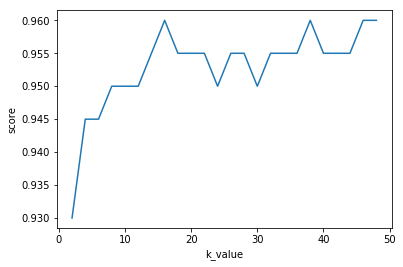

In [86]:
import matplotlib.pyplot as plt
plt.plot(arr_ks,arr_scores)
plt.xlabel('k_value')
plt.ylabel('score')

In [88]:
#将上图中最高分值对应的k值找到，找到的这个值就是模型最优的超参数的取值
np.argmax(arr_scores) #找出arr_scores数组中最大值对应的下标

7

In [89]:
#最优的模型参数的值是
arr_ks[np.argmax(arr_scores)]

16

In [90]:
#使用学习曲线找寻到的最优的超参数进行建模，查看模型效果
mm = MinMaxScaler()
mm_feature = mm.fit_transform(feature)
x_train,x_test,y_train,y_test = train_test_split(mm_feature,target,test_size=0.2,random_state=2020)
knn = KNeighborsClassifier(n_neighbors=16).fit(x_train,y_train)
knn.score(x_test,y_test)

0.96

### k的取值问题：学习曲线&交叉验证选取K值
    - K值较小，则模型复杂度较高，容易发生过拟合，学习的估计误差会增大，预测结果对近邻的实例点非常敏感。
    - K值较大可以减少学习的估计误差，但是学习的近似误差会增大，与输入实例较远的训练实例也会对预测起作用，使预测发生错误，k值增大模型的复杂度会下降。
    - 在应用中，k值一般取一个比较小的值，通常采用交叉验证法来来选取最优的K值。
- 适用场景
    - 小数据场景，样本为几千，几万的
    

## K折交叉验证
- 目的：
    - 选出最为适合的模型超参数的取值，然后将超参数的值作用到模型的创建中。
- 思想：
    - 将样本的训练数据交叉的拆分出不同的训练集和验证集，使用交叉拆分出不同的训练集和验证集测分别试模型的精准度，然就求出的精准度的均值就是此次交叉验证的结果。将交叉验证作用到不同的超参数中，选取出精准度最高的超参数作为模型创建的超参数即可！
- 实现思路：
    - 将训练数据平均分割成K个等份
    - 使用1份数据作为验证数据，其余作为训练数据
    - 计算验证准确率
    - 使用不同的测试集，重复2、3步骤
    - 对准确率做平均，作为对未知数据预测准确率的估计
    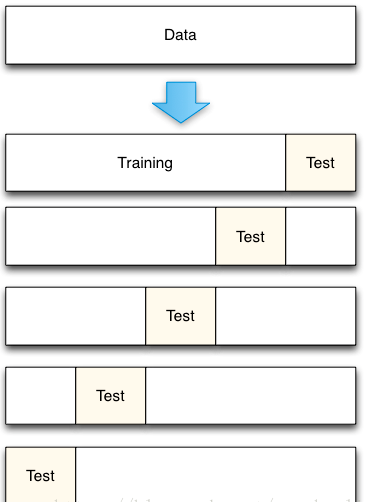

- API
    - from sklearn.model_selection import cross_val_score
    - cross_val_score(estimator,X,y,cv):
        - estimator:模型对象
        - X,y:训练集数据
        - cv：折数

- 交叉验证在KNN中的基本使用

In [92]:
#之前没有使用交叉验证进行评分的代码
mm = MinMaxScaler()
mm_feature = mm.fit_transform(feature)
x_train,x_test,y_train,y_test = train_test_split(mm_feature,target,test_size=0.2,random_state=2020)
knn = KNeighborsClassifier(n_neighbors=16).fit(x_train,y_train)
knn.score(x_test,y_test)

0.96

In [95]:
#使用交叉验证进行模型评分
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_train,y_train,cv=5).mean()

0.9512499999999999

- 使用交叉验证&学习曲线找寻最优的超参数


In [98]:
#继续使用约会网站的数据集
ks = []
scores = []
for k in range(2,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x_train,y_train,cv=5).mean()
    ks.append(k)
    scores.append(score)
arr_ks = np.array(ks)
arr_scores = np.array(scores)

Text(0, 0.5, 'cross_score')

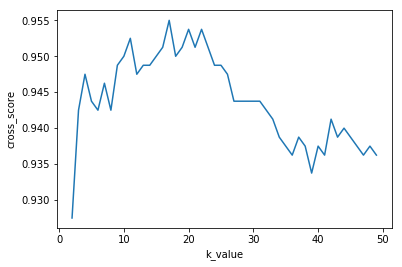

In [99]:
plt.plot(arr_ks,arr_scores)
plt.xlabel('k_value')
plt.ylabel('cross_score')

In [100]:
np.argmax(arr_scores) #找出分值最高的下标

15

In [101]:
arr_ks[np.argmax(arr_scores)]

17